In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pybaseball import statcast #https://github.com/jldbc/pybaseball

### Questions:
1. How does mlb get the colored batter box?

### Inspiration:
1. https://github.com/jwilsonds/swing_probability_model/blob/master/votto%20swing%20probability.ipynb 



https://www.kaggle.com/code/nickwan/attack-zones-visualizing-the-strike-zone

In [2]:
#first example from pybaseball documentation
#statcast(start_dt="2019-06-24", end_dt="2019-06-25").columns

In [3]:
from pybaseball import  playerid_lookup
from pybaseball import  statcast_pitcher
from pybaseball import  statcast_batter

In [4]:
#lookup for a player using their name. useful to find their id
#id = key_mlbam
playerid_lookup('soto', 'juan')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,soto,juan,665742,sotoj001,sotoju01,20123,2018.0,2024.0


In [5]:
#juan soto's id is 665742
#find juan soto's stats from '2023-04-21' to '2024-04-21'
soto_stats = statcast_batter('2023-04-21', '2024-04-21', 665742)
soto_stats

Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,CU,2024-04-21,76.7,-0.78,6.51,"Soto, Juan",665742,650644,field_out,hit_into_play,...,1,1,1,1,1,Infield shade,Standard,43.0,-0.029,-0.392
1,SI,2024-04-21,91.1,-1.13,6.24,"Soto, Juan",665742,650644,NaN,ball,...,1,1,1,1,1,Infield shade,Standard,209.0,0.000,0.116
2,SI,2024-04-21,92.2,-1.14,6.23,"Soto, Juan",665742,650644,NaN,called_strike,...,1,1,1,1,1,Infield shade,Standard,210.0,0.000,-0.060
3,FF,2024-04-21,91.2,-0.93,6.45,"Soto, Juan",665742,650644,NaN,ball,...,1,1,1,1,1,Infield shade,Standard,206.0,0.000,0.065
4,FS,2024-04-21,84.7,-1.18,6.23,"Soto, Juan",665742,650644,NaN,ball,...,1,1,1,1,1,Infield shade,Standard,232.0,0.000,0.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,FC,2023-04-21,88.5,-2.93,5.83,"Soto, Juan",665742,668678,NaN,called_strike,...,0,0,0,0,0,Infield shade,Standard,185.0,0.000,-0.038
3119,KC,2023-04-21,84.7,-2.93,5.86,"Soto, Juan",665742,668678,field_out,hit_into_play,...,0,0,0,0,0,Infield shade,Standard,44.0,0.015,-0.196
3120,CH,2023-04-21,85.0,-2.97,5.81,"Soto, Juan",665742,668678,NaN,ball,...,0,0,0,0,0,Infield shade,Standard,228.0,0.000,0.034
3121,CH,2023-04-21,87.7,-3.09,5.80,"Soto, Juan",665742,668678,NaN,called_strike,...,0,0,0,0,0,Infield shade,Standard,221.0,0.000,-0.031


Useful site to understand what the columns mean: https://baseballsavant.mlb.com/csv-docs

In [6]:
#remove rows where woba_denom is 0.
#because it includes sac_bunt and caught_stealing_2b
soto_stats = soto_stats[soto_stats['woba_denom']!=0]
soto_stats

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,CU,2024-04-21,76.7,-0.78,6.51,"Soto, Juan",665742,650644,field_out,hit_into_play,...,1,1,1,1,1,Infield shade,Standard,43.0,-0.029,-0.392
1,SI,2024-04-21,91.1,-1.13,6.24,"Soto, Juan",665742,650644,NaN,ball,...,1,1,1,1,1,Infield shade,Standard,209.0,0.000,0.116
2,SI,2024-04-21,92.2,-1.14,6.23,"Soto, Juan",665742,650644,NaN,called_strike,...,1,1,1,1,1,Infield shade,Standard,210.0,0.000,-0.060
3,FF,2024-04-21,91.2,-0.93,6.45,"Soto, Juan",665742,650644,NaN,ball,...,1,1,1,1,1,Infield shade,Standard,206.0,0.000,0.065
4,FS,2024-04-21,84.7,-1.18,6.23,"Soto, Juan",665742,650644,NaN,ball,...,1,1,1,1,1,Infield shade,Standard,232.0,0.000,0.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,FC,2023-04-21,88.5,-2.93,5.83,"Soto, Juan",665742,668678,NaN,called_strike,...,0,0,0,0,0,Infield shade,Standard,185.0,0.000,-0.038
3119,KC,2023-04-21,84.7,-2.93,5.86,"Soto, Juan",665742,668678,field_out,hit_into_play,...,0,0,0,0,0,Infield shade,Standard,44.0,0.015,-0.196
3120,CH,2023-04-21,85.0,-2.97,5.81,"Soto, Juan",665742,668678,NaN,ball,...,0,0,0,0,0,Infield shade,Standard,228.0,0.000,0.034
3121,CH,2023-04-21,87.7,-3.09,5.80,"Soto, Juan",665742,668678,NaN,called_strike,...,0,0,0,0,0,Infield shade,Standard,221.0,0.000,-0.031


In [7]:
#soto_stats[soto_stats['woba_value']>0][['events', 'woba_value', 'woba_denom']].sample(10)

woba_value(weighted on base average):

#not sure what the values should be here
- field out/strikeout: 0.0
- walk: 0.70
- field error: 0.9 (prob remove)
- single: 0.90
- double: 1.25
- triple: 1.60
- home_run: 2.0


- ball: 0.175
- strike: 0 (is this bad? strike same value as strikeout)

### plate_x, plate_z, pitch_type -> 'woba_value'

In [8]:
#give woba_value to strikes and balls
rows_to_update_S = soto_stats['type']=='S'
soto_stats.loc[rows_to_update_S, 'woba_value'] = 0
rows_to_update_B = soto_stats['type']=='B'
soto_stats.loc[rows_to_update_B, 'woba_value'] = 0.175

### Soto Strike's Zone? 
#### trying to find it. don't use this. instead use 'sz_top' and 'sz_bot' from jeremiah's medium post

In [9]:
soto_strikes = soto_stats[soto_stats['type']=='S']

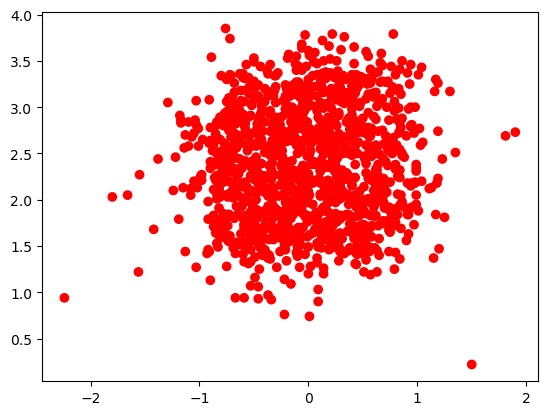

In [10]:
color_map = {'X': 'pink', 'B': 'blue', 'S': 'red'}
plt.scatter(x = soto_strikes['plate_x'], y = soto_strikes['plate_z'], c=soto_strikes['type'].map(color_map), label=color_map)


### Prepare data for model
i followed this xgboost tutorial: https://www.datacamp.com/tutorial/xgboost-in-python

In [11]:
X = soto_stats[['pitch_type', 'plate_x', 'plate_z']]
#allows xgboost to take care of categorical variables.
X['pitch_type'] = X['pitch_type'].astype('category')
X

/var/folders/21/3pfj48b93_dfj5qvpfdk7v0h0000gn/T/ipykernel_55162/2904222147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['pitch_type'] = X['pitch_type'].astype('category')


,pitch_type,plate_x,plate_z
0,CU,-0.17,2.25
1,SI,-1.88,2.23
2,SI,0.29,3.21
3,FF,0.66,3.95
4,FS,-0.59,1.35
...,...,...,...
3118,FC,0.15,2.11
3119,KC,-0.36,2.06
3120,CH,-0.04,1.47
3121,CH,-0.51,1.80


In [12]:
y = soto_stats['woba_value']

In [13]:
#because most pitches are balls and strikes so it brings the mean down
np.mean(soto_stats['woba_value'])

0.15019224607497597

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

### Create the model

how gbm works for regression: https://www.youtube.com/watch?v=3CC4N4z3GJc


In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

In [16]:
#moving data to XGBoost's dataset class to improve memory and speed
dtrain = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [17]:
params = {"objective": "reg:squarederror"}

n = 100
model = xgb.train(
   params=params,
   dtrain=dtrain,
   num_boost_round=n,
)
model

### We don't have a good way of understanding what is a good rmse
### We kind of understand Mean Absolute Error. 0.176 is kind of high as that is the difference between a strike and a ball. 
### going to start a new notebook that predicts if the batter will successfully hit the ball successfully.

In [18]:
predictions = model.predict(dtest)
rmse = mean_squared_error(y_test, predictions, squared=False)
rmse

0.3198917503608765

In [19]:
mae = mean_absolute_error(y_test, predictions)
mae

0.16409826215085896

In [20]:
#soto's fastball pitches in the last year
soto_FF = X[X['pitch_type'] == "FF"]
#create a dmatrix for soto's fastball. dmatrix allows us to pass data into xgboost
soto_FF_dmatrix = xgb.DMatrix(soto_FF, enable_categorical=True)
#predict woba for soto's fastball pitches
soto_FF_predictions = model.predict(soto_FF_dmatrix)

In [21]:
np.mean(soto_FF_predictions)

0.15597704

## Plotting Juan Soto's Predicted wOBA for Fastballs Based on Pitch Location

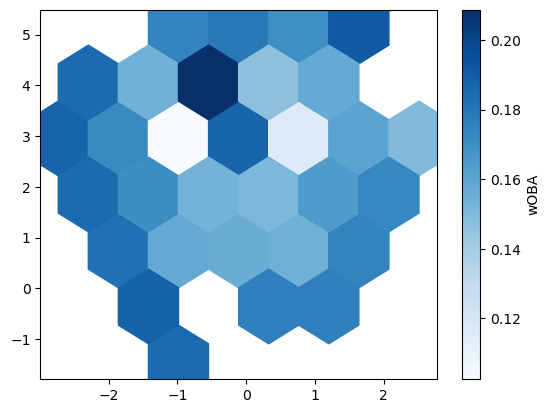

In [22]:
plt.hexbin(x = soto_FF['plate_x'], y = soto_FF['plate_z'], C = soto_FF_predictions, gridsize = 6, cmap='Blues')
cb = plt.colorbar(label='wOBA')

## Main Problem:
#### Hits, HRs are given very little weight right now. basically forgotten about because most pitches are balls and strikes
#### don't know the strike zone
#### don't know the accuracy of the model

#### observations from jeremiah's medium page: get rid of intentional balls, pitchouts, remove rows without pitch location data

#### estimated_woba_using_speedangle might be better than woba

#### seems like there's a lot of variance in the graph above when changing random state for train-test-split. probably because juan soto fastballs in the last year is a "relatively small" sample size

In [23]:
#got it from jeremiah's medium post: best way to get strikezone
soto_stats['sz_top']

0       3.12
1       3.16
2       3.15
3       3.11
4       3.11
        ... 
3118    3.13
3119    3.03
3120    3.15
3121    3.06
3122    3.03
Name: sz_top, Length: 3121, dtype: float64

In [24]:
soto_stats['sz_bot']

0       1.55
1       1.60
2       1.55
3       1.54
4       1.64
        ... 
3118    1.48
3119    1.50
3120    1.56
3121    1.50
3122    1.50
Name: sz_bot, Length: 3121, dtype: float64

In [25]:
#ideas:
#input plate_x and plate_z, velo, pfx_x, pfx_z
#predict w_OBA

In [26]:
#might need a model to predict which type of pitch it is.
#velo, pfx_x, pfx_z -> pitch_type